In [52]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('talk')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [53]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### generate frequency of a particular comibation os lists

In [54]:
pd.crosstab(index=diamonds['cut'], columns=diamonds['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [55]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [56]:
diamonds[diamonds['cut'] == 'Ideal'].head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


In [57]:
pd.crosstab(index=diamonds['cut'],
            columns=diamonds['color'],
            values=diamonds['price'],
            aggfunc=np.mean).round(0)

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.0,2598.0,3375.0,3721.0,3889.0,4452.0,4918.0
Premium,3631.0,3539.0,4325.0,4501.0,5217.0,5946.0,6295.0
Very Good,3470.0,3215.0,3779.0,3873.0,4535.0,5256.0,5104.0
Good,3405.0,3424.0,3496.0,4123.0,4276.0,5079.0,4574.0
Fair,4291.0,3682.0,3827.0,4239.0,5136.0,4685.0,4976.0


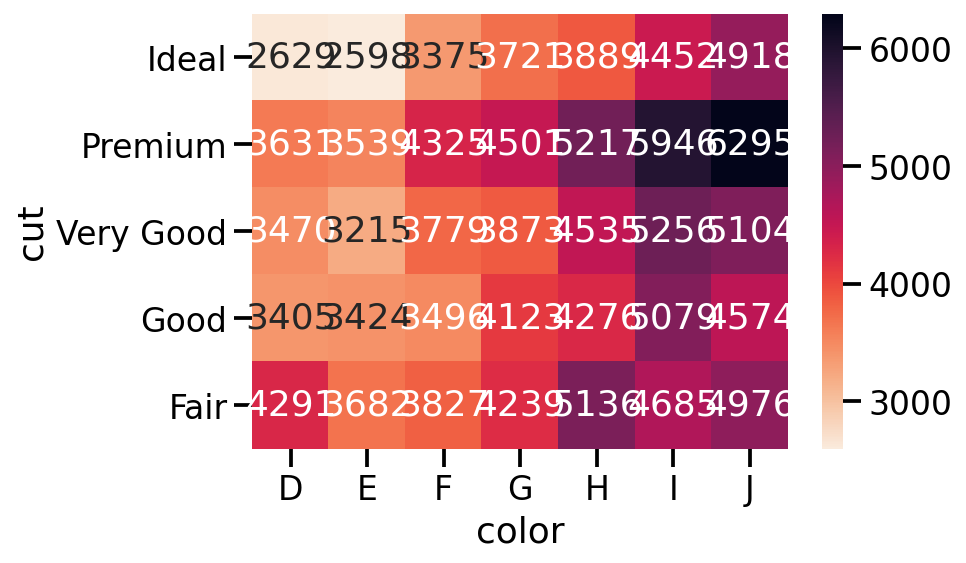

In [58]:
cross = pd.crosstab(index=diamonds['cut'],
                    columns=diamonds['color'],
                    values=diamonds['price'],
                    aggfunc=np.mean).round(0)
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g');

In [59]:
def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show();

In [60]:
#groupby
diamonds.groupby(['cut', 'color'])['price'].mean().round(0)

cut        color
Ideal      D        2629.0
           E        2598.0
           F        3375.0
           G        3721.0
           H        3889.0
           I        4452.0
           J        4918.0
Premium    D        3631.0
           E        3539.0
           F        4325.0
           G        4501.0
           H        5217.0
           I        5946.0
           J        6295.0
Very Good  D        3470.0
           E        3215.0
           F        3779.0
           G        3873.0
           H        4535.0
           I        5256.0
           J        5104.0
Good       D        3405.0
           E        3424.0
           F        3496.0
           G        4123.0
           H        4276.0
           I        5079.0
           J        4574.0
Fair       D        4291.0
           E        3682.0
           F        3827.0
           G        4239.0
           H        5136.0
           I        4685.0
           J        4976.0
Name: price, dtype: float64

In [61]:
# Using pivot_table()
diamonds.pivot_table(values='price',
                     index='cut',
                     columns='color',
                     aggfunc=np.mean).round(0)

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.0,2598.0,3375.0,3721.0,3889.0,4452.0,4918.0
Premium,3631.0,3539.0,4325.0,4501.0,5217.0,5946.0,6295.0
Very Good,3470.0,3215.0,3779.0,3873.0,4535.0,5256.0,5104.0
Good,3405.0,3424.0,3496.0,4123.0,4276.0,5079.0,4574.0
Fair,4291.0,3682.0,3827.0,4239.0,5136.0,4685.0,4976.0


In [62]:
# Using crosstab()
pd.crosstab(index=diamonds['cut'],
            columns=diamonds['color'],
            values=diamonds['price'],
            aggfunc=np.mean).round(0)

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.0,2598.0,3375.0,3721.0,3889.0,4452.0,4918.0
Premium,3631.0,3539.0,4325.0,4501.0,5217.0,5946.0,6295.0
Very Good,3470.0,3215.0,3779.0,3873.0,4535.0,5256.0,5104.0
Good,3405.0,3424.0,3496.0,4123.0,4276.0,5079.0,4574.0
Fair,4291.0,3682.0,3827.0,4239.0,5136.0,4685.0,4976.0


In [63]:
grouped = diamonds.groupby(['cut', 'color'])['price'].mean().round(0)
grouped.unstack()

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.0,2598.0,3375.0,3721.0,3889.0,4452.0,4918.0
Premium,3631.0,3539.0,4325.0,4501.0,5217.0,5946.0,6295.0
Very Good,3470.0,3215.0,3779.0,3873.0,4535.0,5256.0,5104.0
Good,3405.0,3424.0,3496.0,4123.0,4276.0,5079.0,4574.0
Fair,4291.0,3682.0,3827.0,4239.0,5136.0,4685.0,4976.0


In [64]:
%%timeit
diamonds.pivot_table(values='price',
                     index='cut',
                     columns='color',
                     aggfunc=np.mean)

7.61 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
%%timeit
pd.crosstab(index=diamonds['cut'],
            columns=diamonds['color'],
            values=diamonds['price'],
            aggfunc=np.mean)

7.54 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%%timeit
diamonds.groupby(['cut', 'color'])['price'].mean().unstack()

2.72 ms ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


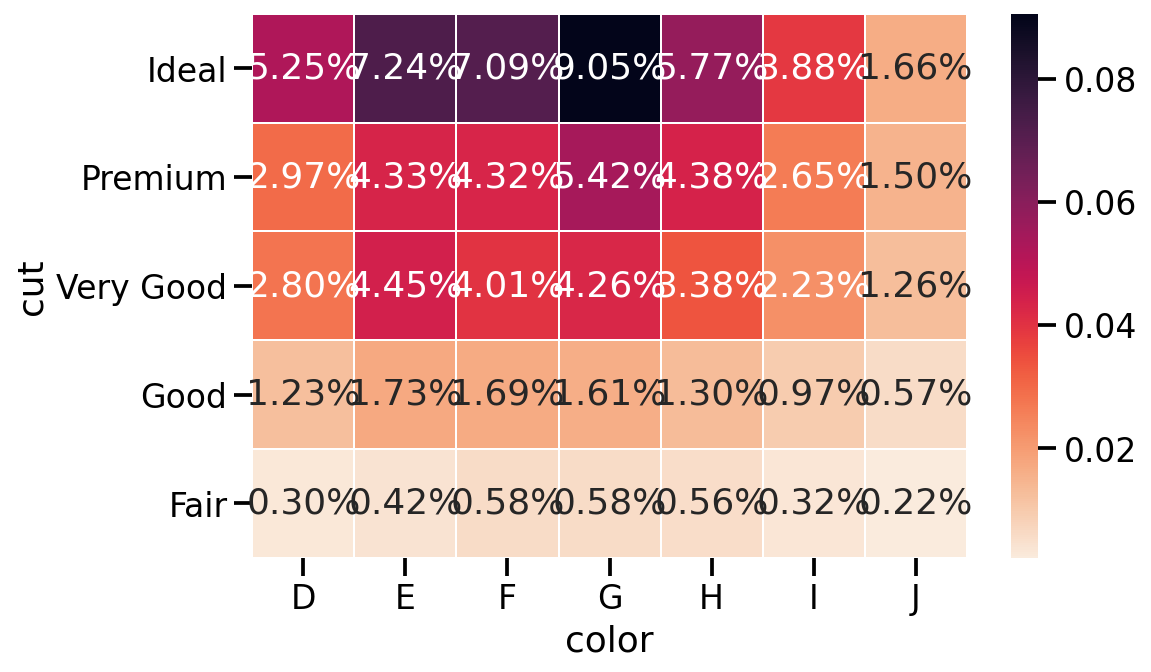

In [67]:
cross = pd.crosstab(index=diamonds['cut'],
                    columns=diamonds['color'],
                    normalize='all')
plot_heatmap(cross, fmt='.2%')

* Crosstab can work with any type of list: series, list, dataframe
* pivot_table wokrs only with dataframes 
* crosstab internally used pivot_table when input is a dataframe

# crosstab parameters --- Normalize

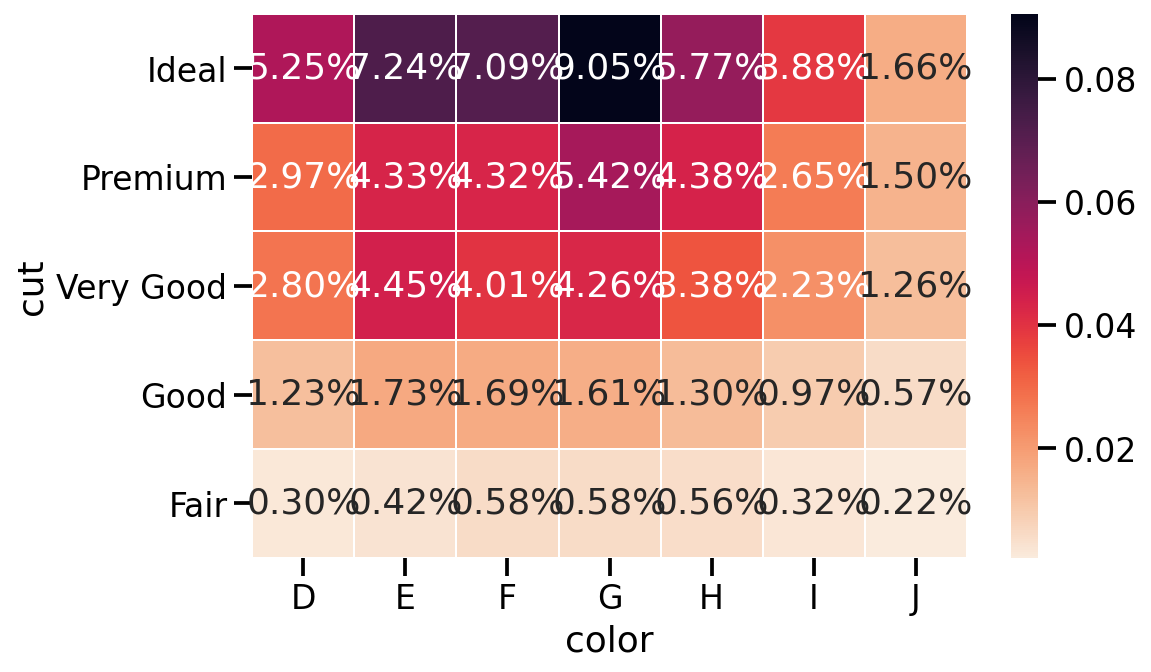

In [68]:
cross = pd.crosstab(index=diamonds['cut'],
                    columns=diamonds['color'],
                    normalize='all')
plot_heatmap(cross, fmt='.2%')

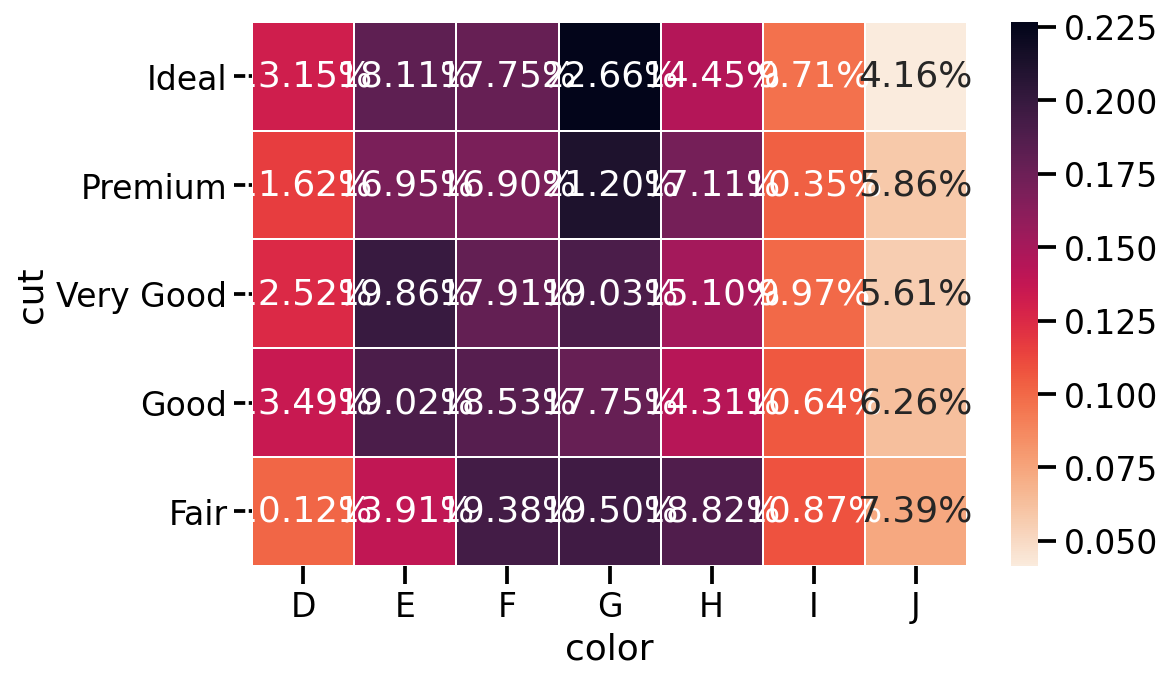

In [69]:
cross = pd.crosstab(index=diamonds['cut'],
                    columns=diamonds['color'],
                    normalize='index')
plot_heatmap(cross, fmt='.2%')

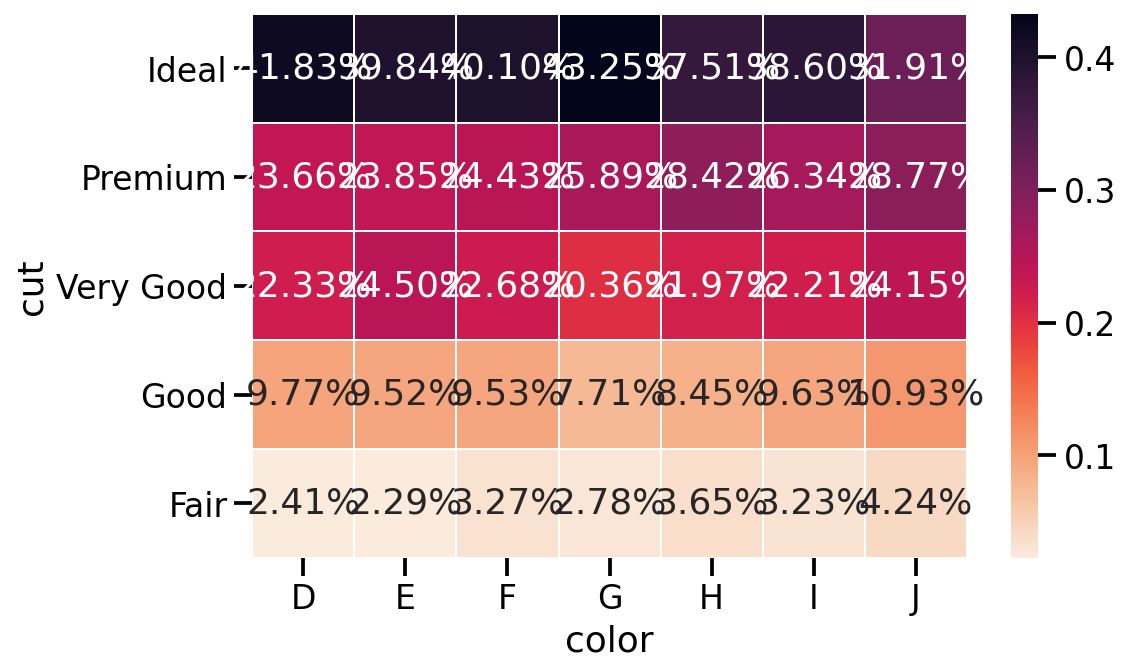

In [70]:
cross = pd.crosstab(index=diamonds['cut'],
                    columns=diamonds['color'],
                    normalize='columns')
plot_heatmap(cross, fmt='.2%')

In [71]:
pd.crosstab(diamonds['cut'], 
                diamonds['color'], 
                normalize='all').values.sum()

1.0000000000000002

In [72]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# fill_value is available only in pivot_table

In [73]:
diamonds.pivot_table(index='color', 
                     columns='cut', 
                     fill_value=0)

carat                                              depth             \
cut       Ideal   Premium Very Good      Good      Fair      Ideal    Premium   
color                                                                           
D      0.565766  0.721547  0.696424  0.744517  0.920123  61.678370  61.169245   
E      0.578401  0.717745  0.676317  0.745134  0.856607  61.686677  61.175909   
F      0.655829  0.827036  0.740961  0.775930  0.904712  61.675562  61.259974   
G      0.700715  0.841488  0.766799  0.850896  1.023822  61.700164  61.279480   
H      0.799525  1.016449  0.915948  0.914729  1.219175  61.733194  61.322034   
I      0.913029  1.144937  1.046952  1.057222  1.198057  61.793598  61.328641   
J      1.063594  1.293094  1.133215  1.099544  1.341176  61.821987  61.390099   

                                        ...         y                      \
cut    Very Good       Good       Fair  ...     Ideal   Premium Very Good   
color                                   ...                                 
D      61.750165  62.365710  64.048466  ...  5.196224  5.571472  5.531613   
E      61.730250  62.203751  63.319643  ...  5.232214  5.558353  5.463213   
F      61.721627  62.202310  63.508013  ...  5.422250  5.844655  5.642717   
G      61.841279  62.526636  64.339809  ...  5.524007  5.833345  5.688752   
H      61.968366  62.499573  64.585149  ...  5.740446  6.228110  6.006272   
I      61.934551  62.475096  64.220571  ...  5.989479  6.453270  6.299028   
J      61.902065  62.395765  64.357143  ...  6.332098  6.770644  6.495074   

                                  z                                          
cut        Good      Fair     Ideal   Premium Very Good      Good      Fair  
color                                                                        
D      5.633897  5.963190  3.201800  3.415926  3.405089  3.504864  3.839877  
E      5.632454  5.858214  3.220346  3.408875  3.373996  3.496066  3.722143  
F      5.709659  5.931122  3.338732  3.588391  3.472902  3.544609  3.787821  
G      5.862824  6.114076  3.403120  3.579641  3.509883  3.647922  3.963153  
H      5.974245  6.497393  3.539917  3.811699  3.713849  3.726937  4.219373  
I      6.260536  6.493486  3.695270  3.963894  3.890972  3.901513  4.193486  
J      6.386026  6.675882  3.912757  4.168020  4.006873  3.977459  4.319664  

[7 rows x 35 columns]

# fillna is to crosstab what fill_value is to pivot_table

In [74]:
pd.crosstab(diamonds['cut'], diamonds['color']).fillna(0)

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [75]:
#dropna() is availabel for both pivot_table and crosstab()

# crosstab parameters --- margins and margins_name

In [76]:
pd.crosstab(index=diamonds['cut'], 
            columns=diamonds['clarity'],  
            margins=True)

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1,All
cut,,,,,,,,,
Ideal,1212,2047,2606,3589,5071,4282,2598,146,21551
Premium,230,616,870,1989,3357,3575,2949,205,13791
Very Good,268,789,1235,1775,2591,3240,2100,84,12082
Good,71,186,286,648,978,1560,1081,96,4906
Fair,9,17,69,170,261,408,466,210,1610
All,1790,3655,5066,8171,12258,13065,9194,741,53940


In [77]:
pd.crosstab(index=diamonds['cut'],
            columns=diamonds['clarity'],
            margins=True,
            margins_name='Total Number')

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1,Total Number
cut,,,,,,,,,
Ideal,1212,2047,2606,3589,5071,4282,2598,146,21551
Premium,230,616,870,1989,3357,3575,2949,205,13791
Very Good,268,789,1235,1775,2591,3240,2100,84,12082
Good,71,186,286,648,978,1560,1081,96,4906
Fair,9,17,69,170,261,408,466,210,1610
Total Number,1790,3655,5066,8171,12258,13065,9194,741,53940


In [78]:
pd.crosstab(index=diamonds['cut'],
            columns=diamonds['clarity'],
            margins=True,
            margins_name='Total Percentage',
            normalize=True)

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1,Total Percentage
cut,,,,,,,,,
Ideal,0.022469,0.037950,0.048313,0.066537,0.094012,0.079385,0.048165,0.002707,0.399537
Premium,0.004264,0.011420,0.016129,0.036874,0.062236,0.066277,0.054672,0.003801,0.255673
Very Good,0.004968,0.014627,0.022896,0.032907,0.048035,0.060067,0.038932,0.001557,0.223990
Good,0.001316,0.003448,0.005302,0.012013,0.018131,0.028921,0.020041,0.001780,0.090953
Fair,0.000167,0.000315,0.001279,0.003152,0.004839,0.007564,0.008639,0.003893,0.029848
Total Percentage,0.033185,0.067760,0.093919,0.151483,0.227253,0.242214,0.170449,0.013737,1.000000


# Multiple Groupings

In [79]:
pd.crosstab(index=[diamonds['cut'], diamonds['clarity']],
            columns=diamonds['color'])

color                D     E    F    G    H    I    J
cut       clarity                                    
Ideal     IF        28    79  268  491  226   95   25
          VVS1     144   335  440  594  326  179   29
          VVS2     284   507  520  774  289  178   54
          VS1      351   593  616  953  467  408  201
          VS2      920  1136  879  910  556  438  232
          SI1      738   766  608  660  763  504  243
          SI2      356   469  453  486  450  274  110
          I1        13    18   42   16   38   17    2
Premium   IF        10    27   31   87   40   23   12
          VVS1      40   105   80  171  112   84   24
          VVS2      94   121  146  275  118   82   34
          VS1      131   292  290  566  336  221  153
          VS2      339   629  619  721  532  315  202
          SI1      556   614  608  566  655  367  209
          SI2      421   519  523  492  521  312  161
          I1        12    30   34   46   46   24   13
Very Good IF        23    43   67   79   29   19    8
          VVS1      52   170  174  190  115   69   19
          VVS2     141   298  249  302  145   71   29
          VS1      175   293  293  432  257  205  120
          VS2      309   503  466  479  376  274  184
          SI1      494   626  559  474  547  358  182
          SI2      314   445  343  327  343  200  128
          I1         5    22   13   16   12    8    8
Good      IF         9     9   15   22    4    6    6
          VVS1      13    43   35   41   31   22    1
          VVS2      25    52   50   75   45   26   13
          VS1       43    89  132  152   77  103   52
          VS2      104   160  184  192  138  110   90
          SI1      237   355  273  207  235  165   88
          SI2      223   202  201  163  158   81   53
          I1         8    23   19   19   14    9    4
Fair      IF         3     0    4    2    0    0    0
          VVS1       3     3    5    3    1    1    1
          VVS2       9    13   10   17   11    8    1
          VS1        5    14   33   45   32   25   16
          VS2       25    42   53   45   41   32   23
          SI1       58    65   83   69   75   30   28
          SI2       56    78   89   80   91   45   27
          I1         4     9   35   53   52   34   23

In [80]:
pd.crosstab(index=[diamonds['cut'], diamonds['clarity']],
            columns=diamonds['color'], 
            rownames=['Diamond Cut', 'Diamond Clarity']).head()

color                          D     E    F    G    H    I    J
Diamond Cut Diamond Clarity                                    
Ideal       IF                28    79  268  491  226   95   25
            VVS1             144   335  440  594  326  179   29
            VVS2             284   507  520  774  289  178   54
            VS1              351   593  616  953  467  408  201
            VS2              920  1136  879  910  556  438  232

In [88]:
pd.crosstab(index=[diamonds['cut'], diamonds['clarity']],
            columns=diamonds['color'], 
            rownames=['Diamond Cut', 'Diamond Clarity'], 
           colnames = ['hello']).head()

hello                          D     E    F    G    H    I    J
Diamond Cut Diamond Clarity                                    
Ideal       IF                28    79  268  491  226   95   25
            VVS1             144   335  440  594  326  179   29
            VVS2             284   507  520  774  289  178   54
            VS1              351   593  616  953  467  408  201
            VS2              920  1136  879  910  556  438  232